# Studying the Titanic Survival

The sinking of the RMS Titanic is one of the most tragic, shocking shipwrecks in history. The ship sank off the coast of Newfoundland in the North Atlantic Ocean on April 4, 1912 , after colliding with an iceberg. According to [History.com](http://www.history.com/topics/titanic), more than 1500 out of 2240 passengers lost their lives. In this data science study, we will compute and visualize the survival rates by passenger class, sex, and age. Before attempting the computation and visualization, we will need to perform data cleaning on the [dataset](https://www.kaggle.com/c/titanic/data) first (handling missing data, in this case), as required for most data science projects.

## 1. Importing modules

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Reading and inspecting data

In [45]:
# Read the "titanic_data.csv" file into a DataFrame using pandas and get its information
df_titanic = pd.read_csv('titanic_data.csv', index_col=0)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The df_titanic DataFrame consists of 891 rows (entries) and 11 columns (features), 3 data types, and missing data in columns "Age," "Cabin," and "Embarked." 

In [46]:
# Peak at first 5 rows of df_titanic
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### What do the columns and their values mean?
Survived: Survival (0 = no; 1 = yes)
<br>Class: Passenger class (1 = First; 2 = Second; 3 = Third)
<br>Name: Name
<br>Sex: Male/female
<br>Age: Age
<br>SibSp: Number of siblings/spouses aboard
<br>Parch: Number of parents/children aboard
<br>Ticket: Ticket number
<br>Fare: Passenger ticket fare
<br>Cabin: Cabin name
<br>Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## 3. Handling missing data

The missing values in the "Age" column are of the most interest, since we will later determine the survival rate by age. Let's fill in the missing values by imputing the median, as deleting all the missing values will likely decrease the accuracy of the computed survival rate.

In [47]:
# Write a function to impute the median, i.e. filling missing values with the median of a series
def impute_median(series):
    return series.fillna(series.median())

# Fill missing values in the 'Age' column    
df_titanic['Age'] = df_titanic['Age'].transform(impute_median)

# Print out DataFrame information to verify if missing values were filled
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


Now the "Age" column has 891 non-null values. That is the full set of values!

## 4. Computing survival rates

### 4.1 Overall survival rate

In [48]:
# Find the overall survival rate for a Titanic passenger
overall_survival_rate = df_titanic['Survived'].mean()
print('The overall chance of survival for a Titanic passenger is: ' + str(overall_survival_rate))

The overall chance of survival for a Titanic passenger is: 0.3838383838383838


Tragically, 62% of passengers did not survive the accident.

### 4.2 Survival rates by passenger class

In [49]:
# Find the survival rates by passenger class
survival_rate_by_class = df_titanic.loc[:, ['Pclass', 'Survived']].groupby('Pclass').mean()
print('The survival rates by passenger class:')
print(survival_rate_by_class)

The survival rates by passenger class:
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


The passengers in the first class had the highest survival rate of 63%, followed by the second class.

### 4.3 Survival rates by passenger class and sex

In [50]:
# Find the survival rates by passenger class and sex
survival_rate_by_class_sex = df_titanic.loc[:, ['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean()
print('The survival rates by passenger class and sex:')
print(survival_rate_by_class_sex)

The survival rates by passenger class and sex:
               Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447


Women had a much higher chance to survive than men did in each class. This can imply that women were given a higher priority to get on the lifeboats, as we saw in the Titanic movie. 

### 4.4 Survival rates by age

In [51]:
# Find the survival rates by age in the interval of 10 years
group_by_age = pd.cut(df_titanic['Age'], np.arange(0, 100, 10))
survival_rate_by_age = df_titanic.groupby(group_by_age).mean()
print('The survival rates by age:')
print(survival_rate_by_age.loc[:, ['Survived']])

The survival rates by age:
          Survived
Age               
(0, 10]   0.593750
(10, 20]  0.382609
(20, 30]  0.334152
(30, 40]  0.445161
(40, 50]  0.383721
(50, 60]  0.404762
(60, 70]  0.235294
(70, 80]  0.200000
(80, 90]       NaN


Children under 10 were most likely to survive. Also from the movie, the "women and children first" policy was well executed. Note that there were no passengers 80 years and above. 

## 5. Visualizing survival rates

### 5.1 Survival rates by passenger class

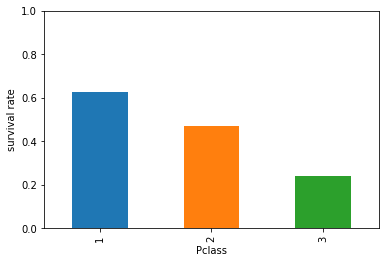

In [52]:
# Plot the survival rates by passenger class in a bar chart
survival_rate_by_class['Survived'].plot.bar()
plt.ylabel('survival rate');
plt.ylim([0,1]);

### 5.2 Survival rates by passenger class and sex

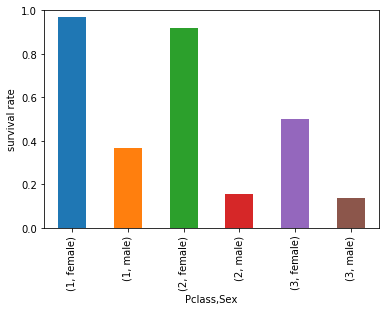

In [53]:
# Plot the survival rates by passenger class and sex in a bar chart
survival_rate_by_class_sex['Survived'].plot.bar()
plt.ylabel('survival rate');
plt.ylim([0,1]);
plt.yticks([0,0.2,0.4,0.6,0.8,1.0]);

### 5.3 Survival rates by age

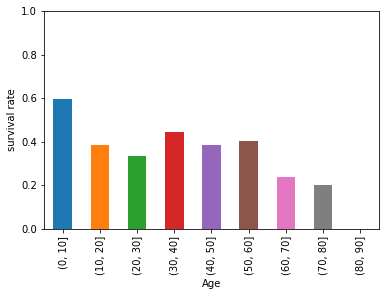

In [54]:
# Plot the survival rates by age in a bar chart
survival_rate_by_age['Survived'].plot.bar()
plt.ylabel('survival rate');
plt.ylim([0,1]);
plt.yticks([0,0.2,0.4,0.6,0.8,1.0]);